In [ ]:
pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train1.csv')

# Separate features and target
X = data.drop(columns=['fraudRisk'])
y = data['fraudRisk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


100%|██████████| 29/29 [00:11<00:00,  2.63it/s]

[LightGBM] [Info] Number of positive: 308, number of negative: 4691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 4999, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061612 -> initscore=-2.723301
[LightGBM] [Info] Start training from score -2.723301
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.90               0.85     0.85      0.92   
Perceptron                         0.93               0.80     0.80      0.93   
QuadraticDiscriminantAnalysis      0.93               0.76     0.76      0.94   
LinearDiscriminantAnalysis         0.95    

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Read the CSV file
data = pd.read_csv('/content/Sample_Train2.csv')

# Separate features and target
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using one-hot encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X_imputed[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and append the encoded columns
X_imputed.drop(columns=categorical_cols, inplace=True)
X_final = pd.concat([X_imputed, X_encoded], axis=1)

# Check for missing values
print("Missing values in features:", X_final.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier with verbose output
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


Missing values in features: 0
Missing values in target: 0


  3%|▎         | 1/29 [00:21<10:14, 21.96s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.916, 'Balanced Accuracy': 0.5198222829801777, 'ROC AUC': 0.5198222829801776, 'F1 Score': 0.889929450369155, 'Time taken': 21.955429315567017}


  7%|▋         | 2/29 [00:39<08:36, 19.14s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.92, 'Balanced Accuracy': 0.49783549783549785, 'ROC AUC': 0.49783549783549785, 'F1 Score': 0.8855, 'Time taken': 17.161767959594727}


 10%|█         | 3/29 [00:42<05:15, 12.14s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 3.7973058223724365}


 14%|█▍        | 4/29 [00:55<05:04, 12.17s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 12.203904867172241}


 17%|█▋        | 5/29 [00:56<03:21,  8.39s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|██        | 6/29 [01:03<03:01,  7.88s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.909, 'Balanced Accuracy': 0.516034404192299, 'ROC AUC': 0.5160344041922988, 'F1 Score': 0.8859099570135867, 'Time taken': 6.88095760345459}


 24%|██▍       | 7/29 [01:05<02:12,  6.04s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 2.247758150100708}


 28%|██▊       | 8/29 [01:08<01:46,  5.05s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.913, 'Balanced Accuracy': 0.5121610845295056, 'ROC AUC': 0.5121610845295056, 'F1 Score': 0.8867490569548522, 'Time taken': 2.926132917404175}


 31%|███       | 9/29 [01:16<01:57,  5.85s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 7.610633373260498}


 34%|███▍      | 10/29 [01:21<01:44,  5.52s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.901, 'Balanced Accuracy': 0.4875541125541126, 'ROC AUC': 0.4875541125541126, 'F1 Score': 0.8758800631246711, 'Time taken': 4.787001848220825}


 38%|███▊      | 11/29 [01:31<02:05,  6.98s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 10.287245988845825}


 41%|████▏     | 12/29 [01:40<02:07,  7.47s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 8.583271741867065}


 45%|████▍     | 13/29 [01:50<02:14,  8.38s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 10.451897144317627}


 48%|████▊     | 14/29 [02:12<03:06, 12.40s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 21.698659420013428}


 52%|█████▏    | 15/29 [02:18<02:29, 10.65s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.84, 'Balanced Accuracy': 0.49077238550922764, 'ROC AUC': 0.49077238550922764, 'F1 Score': 0.8484270520584195, 'Time taken': 6.592946290969849}


 55%|█████▌    | 16/29 [02:26<02:05,  9.63s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 7.257557153701782}


 59%|█████▊    | 17/29 [02:29<01:32,  7.71s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 3.2279045581817627}


 62%|██████▏   | 18/29 [02:31<01:05,  5.96s/it]

NuSVC model failed to execute
specified nu is infeasible


 66%|██████▌   | 19/29 [02:38<01:02,  6.25s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.839, 'Balanced Accuracy': 0.5083447254499885, 'ROC AUC': 0.5083447254499887, 'F1 Score': 0.8499488831417449, 'Time taken': 6.917660474777222}


 69%|██████▉   | 20/29 [02:42<00:49,  5.55s/it]

{'Model': 'Perceptron', 'Accuracy': 0.853, 'Balanced Accuracy': 0.5038448393711552, 'ROC AUC': 0.5038448393711552, 'F1 Score': 0.8567489892900206, 'Time taken': 3.9051461219787598}


 72%|███████▏  | 21/29 [03:05<01:26, 10.78s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 22.97716784477234}


 76%|███████▌  | 22/29 [03:10<01:04,  9.23s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 5.602122783660889}


 79%|███████▉  | 23/29 [03:15<00:47,  7.88s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 4.727432489395142}


 83%|████████▎ | 24/29 [03:20<00:34,  6.93s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 4.727036476135254}


 86%|████████▌ | 25/29 [03:24<00:24,  6.02s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 3.8953380584716797}


 90%|████████▉ | 26/29 [04:42<01:23, 27.77s/it]

{'Model': 'SVC', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 78.5115282535553}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [04:58<00:18, 18.72s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.917, 'Balanced Accuracy': 0.5143255866940077, 'ROC AUC': 0.5143255866940077, 'F1 Score': 0.8889917273737499, 'Time taken': 16.327574491500854}
[LightGBM] [Info] Number of positive: 69, number of negative: 930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 297
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069069 -> initscore=-2.601078
[LightGBM] [Info] Start training from score -2.601078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [05:04<00:00, 10.50s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.923, 'Balanced Accuracy': 0.50549669628617, 'ROC AUC': 0.5054966962861699, 'F1 Score': 0.8888870907162014, 'Time taken': 5.631306886672974}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.92               0.52     0.52      0.89   
DecisionTreeClassifier             0.91               0.52     0.52      0.89   
XGBClassifier                      0.92               0.51     0.51      0.89   
ExtraTreeClassifier                0.91               0.51     0.51      0.89   
PassiveAggressiveClassifier        0.84               0.51     0.51      0.85   
LGBMClassifier                     0.92               0.51     0.51      0.89   
Perceptron                         0.85               0.50     0.50      0.86   
DummyClassifier                    0.92               0.50     0.50      0.89   
ExtraTre

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train3.csv')

# Separate features and target
X = data.drop(columns=['fraud'])
y = data['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


100%|██████████| 29/29 [00:07<00:00,  3.76it/s]

[LightGBM] [Info] Number of positive: 397, number of negative: 4602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 4999, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.079416 -> initscore=-2.450310
[LightGBM] [Info] Start training from score -2.450310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             1.00               0.99   

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train4.csv')

# Separate features and target
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


 97%|█████████▋| 28/29 [00:21<00:00,  1.47it/s]

[LightGBM] [Info] Number of positive: 1150, number of negative: 3849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3501
[LightGBM] [Info] Number of data points in the train set: 4999, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230046 -> initscore=-1.208051
[LightGBM] [Info] Start training from score -1.208051


100%|██████████| 29/29 [00:21<00:00,  1.33it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.67               0.66     0.66      0.70   
LGBMClassifier                     0.80               0.64     0.64      0.78   
XGBClassifier                      0.79               0.64     0.64      0.78   
BernoulliNB                        0.79               0.63     0.63      0.77   
RandomForestClassifier             0.81               0.63     0.63      0.78   
ExtraTreesClassifier               0.80               0.63     0.63      0.78   
AdaBoostClassifier                 0.80               0.62     0.62      0.77   
BaggingClassifier                  0.79               0.62     0.62      0.77   
SVC                                0.81               0.62     0.62      0.78   
KNeighborsClassifier               0.78               0.62     0.62      0.76   
NearestCentroid             

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train5.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


 97%|█████████▋| 28/29 [00:16<00:00,  2.39it/s]

[LightGBM] [Info] Number of positive: 2518, number of negative: 2482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503600 -> initscore=0.014400
[LightGBM] [Info] Start training from score 0.014400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

100%|██████████| 29/29 [00:17<00:00,  1.64it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
SVC                                1.00               1.00     1.00      1.00   
LinearSVC                   

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Read the CSV file
data = pd.read_csv('/content/Sample_Train6.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Check for class imbalance
print("Class distribution in target variable:")
print(y.value_counts())

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using label encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_imputed[col] = encoder.fit_transform(X_imputed[col])

# If there is class imbalance, balance the classes by downsampling the majority class
min_class = y.value_counts().idxmin()
maj_class = y.value_counts().idxmax()
if y.value_counts()[min_class] / y.value_counts()[maj_class] < 0.5:
    X_imputed['Class'] = y
    minority = X_imputed[X_imputed['Class'] == min_class]
    majority = X_imputed[X_imputed['Class'] == maj_class]

    # Downsample majority class
    majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

    # Combine minority class with downsampled majority class
    balanced_data = pd.concat([minority, majority_downsampled])

    # Separate features and target after downsampling
    X_imputed = balanced_data.drop(columns=['Class'])
    y = balanced_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


Class distribution in target variable:
Class
0    9961
1      38
Name: count, dtype: int64


100%|██████████| 29/29 [00:00<00:00, 29.07it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 20, number of negative: 18
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.526316 -> initscore=0.105361
[LightGBM] [Info] Start training from score 0.105361
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Read the CSV file
data = pd.read_csv('/content/Sample_Train7.csv')

# Separate features and target
X = data.drop(columns=['NFLAG_INSURED_ON_APPROVAL'])
y = data['NFLAG_INSURED_ON_APPROVAL']

# Check for class imbalance
print("Class distribution in target variable:")
print(y.value_counts())

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using label encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_imputed[col] = encoder.fit_transform(X_imputed[col])

# If there is class imbalance, balance the classes by downsampling the majority class
min_class = y.value_counts().idxmin()
maj_class = y.value_counts().idxmax()
if y.value_counts()[min_class] / y.value_counts()[maj_class] < 0.5:
    X_imputed['NFLAG_INSURED_ON_APPROVAL'] = y
    minority = X_imputed[X_imputed['NFLAG_INSURED_ON_APPROVAL'] == min_class]
    majority = X_imputed[X_imputed['NFLAG_INSURED_ON_APPROVAL'] == maj_class]

    # Downsample majority class
    majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

    # Combine minority class with downsampled majority class
    balanced_data = pd.concat([minority, majority_downsampled])

    # Separate features and target after downsampling
    X_imputed = balanced_data.drop(columns=['NFLAG_INSURED_ON_APPROVAL'])
    y = balanced_data['NFLAG_INSURED_ON_APPROVAL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


Class distribution in target variable:
NFLAG_INSURED_ON_APPROVAL
0.00    4155
1.00    1988
Name: count, dtype: int64


 97%|█████████▋| 28/29 [00:10<00:00,  5.42it/s]

[LightGBM] [Info] Number of positive: 994, number of negative: 994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3639
[LightGBM] [Info] Number of data points in the train set: 1988, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:10<00:00,  2.80it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.90     0.90      0.90   
XGBClassifier                      0.90               0.90     0.90      0.90   
ExtraTreesClassifier               0.88               0.88     0.88      0.88   
RandomForestClassifier             0.88               0.88     0.88      0.88   
BaggingClassifier                  0.87               0.87     0.87      0.87   
AdaBoostClassifier                 0.87               0.87     0.87      0.87   
SVC                                0.87               0.87     0.87      0.87   
NuSVC                              0.86               0.86     0.86      0.85   
DecisionTreeClassifier             0.85               0.85     0.85      0.85   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
LinearSVC                   

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train8.csv')

# Separate features and target
X = data.drop(columns=['targets'])
y = data['targets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)

 97%|█████████▋| 28/29 [00:24<00:00,  2.03it/s]

[LightGBM] [Info] Number of positive: 980, number of negative: 4020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4258
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196000 -> initscore=-1.411485
[LightGBM] [Info] Start training from score -1.411485


100%|██████████| 29/29 [00:25<00:00,  1.15it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.93               0.87     0.87      0.93   
XGBClassifier                      0.93               0.86     0.86      0.92   
ExtraTreesClassifier               0.93               0.85     0.85      0.92   
DecisionTreeClassifier             0.90               0.84     0.84      0.90   
AdaBoostClassifier                 0.92               0.84     0.84      0.91   
BaggingClassifier                  0.91               0.84     0.84      0.91   
RandomForestClassifier             0.92               0.84     0.84      0.92   
BernoulliNB                        0.86               0.83     0.83      0.86   
KNeighborsClassifier               0.90               0.81     0.81      0.89   
ExtraTreeClassifier                0.88               0.81     0.81      0.88   
Perceptron                  

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Read the CSV file
data = pd.read_csv('/content/Sample_Train9.csv')

# Separate features and target
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using label encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_imputed[col] = encoder.fit_transform(X_imputed[col])

# Combine the features and target to downsample
data_balanced = pd.concat([X_imputed, y], axis=1)

# Separate majority and minority classes
majority = data_balanced[data_balanced.isFraud == 0]
minority = data_balanced[data_balanced.isFraud == 1]

# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([minority, majority_downsampled])

# Separate features and target after downsampling
X_balanced = data_balanced.drop(columns=['isFraud'])
y_balanced = data_balanced['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


  3%|▎         | 1/29 [00:00<00:13,  2.07it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8529411764705882, 'Balanced Accuracy': 0.8529411764705882, 'ROC AUC': 0.8529411764705882, 'F1 Score': 0.8528138528138528, 'Time taken': 0.47178125381469727}


 14%|█▍        | 4/29 [00:00<00:04,  5.52it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764707, 'F1 Score': 0.8822510822510822, 'Time taken': 0.1947035789489746}
{'Model': 'BernoulliNB', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.048512935638427734}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.12762689590454102}


 28%|██▊       | 8/29 [00:01<00:01, 11.56it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8382352941176471, 'Balanced Accuracy': 0.838235294117647, 'ROC AUC': 0.8382352941176471, 'F1 Score': 0.837919826652221, 'Time taken': 0.026130199432373047}
{'Model': 'DummyClassifier', 'Accuracy': 0.5, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3333333333333333, 'Time taken': 0.020283222198486328}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8529411764705882, 'Balanced Accuracy': 0.8529411764705882, 'ROC AUC': 0.8529411764705882, 'F1 Score': 0.8517872711421098, 'Time taken': 0.061893463134765625}


 34%|███▍      | 10/29 [00:01<00:03,  5.36it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9117647058823529, 'Balanced Accuracy': 0.9117647058823529, 'ROC AUC': 0.9117647058823529, 'F1 Score': 0.9117647058823528, 'Time taken': 0.7243010997772217}
{'Model': 'GaussianNB', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.08369970321655273}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8235294117647058, 'Balanced Accuracy': 0.8235294117647058, 'ROC AUC': 0.8235294117647058, 'F1 Score': 0.8210526315789475, 'Time taken': 0.08598852157592773}


 48%|████▊     | 14/29 [00:02<00:01,  8.00it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.06216001510620117}
{'Model': 'LabelSpreading', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.060183048248291016}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8819444444444443, 'Time taken': 0.05931568145751953}
{'Model': 'LinearSVC', 'Accuracy': 0.9117647058823529, 'Balanced Accuracy': 0.9117647058823529, 'ROC AUC': 0.9117647058823529, 'F1 Score': 0.9117647058823528, 'Time taken': 0.04722094535827637}


 62%|██████▏   | 18/29 [00:02<00:00, 11.26it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.06759262084960938}
{'Model': 'NearestCentroid', 'Accuracy': 0.8235294117647058, 'Balanced Accuracy': 0.8235294117647058, 'ROC AUC': 0.8235294117647058, 'F1 Score': 0.8221447253705321, 'Time taken': 0.039559125900268555}
{'Model': 'NuSVC', 'Accuracy': 0.8676470588235294, 'Balanced Accuracy': 0.8676470588235294, 'ROC AUC': 0.8676470588235293, 'F1 Score': 0.86738894907909, 'Time taken': 0.059978485107421875}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764707, 'F1 Score': 0.8822510822510822, 'Time taken': 0.06533694267272949}


 69%|██████▉   | 20/29 [00:02<00:00, 10.94it/s]

{'Model': 'Perceptron', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8823529411764706, 'Time taken': 0.1246500015258789}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8235294117647058, 'Balanced Accuracy': 0.8235294117647058, 'ROC AUC': 0.8235294117647058, 'F1 Score': 0.8221447253705321, 'Time taken': 0.07099771499633789}


 86%|████████▌ | 25/29 [00:03<00:00,  8.32it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8676470588235294, 'Balanced Accuracy': 0.8676470588235294, 'ROC AUC': 0.8676470588235294, 'F1 Score': 0.8676184295911744, 'Time taken': 0.6233787536621094}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8819444444444443, 'Time taken': 0.05735421180725098}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8676470588235294, 'Balanced Accuracy': 0.8676470588235294, 'ROC AUC': 0.8676470588235293, 'F1 Score': 0.86738894907909, 'Time taken': 0.033010005950927734}
{'Model': 'SGDClassifier', 'Accuracy': 0.8235294117647058, 'Balanced Accuracy': 0.8235294117647058, 'ROC AUC': 0.8235294117647058, 'F1 Score': 0.8233766233766234, 'Time taken': 0.028010845184326172}
{'Model': 'SVC', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.028348922729492188}


100%|██████████| 29/29 [00:04<00:00,  6.94it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.8676470588235294, 'Balanced Accuracy': 0.8676470588235294, 'ROC AUC': 0.8676470588235294, 'F1 Score': 0.8676184295911744, 'Time taken': 0.6384563446044922}
[LightGBM] [Info] Number of positive: 34, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train1.csv")
print(credit.head())

   custID  gender  state  cardholder  balance  numTrans  numIntlTrans  \
0       1       1     35           1     3000         4            14   
1       2       2      2           1        0         9             0   
2       3       2      2           1        0        27             9   
3       4       1     15           1        0        12             0   
4       5       1     46           1        0        11            16   

   creditLine  fraudRisk  
0           2          0  
1          18          0  
2          16          0  
3           5          0  
4           7          0  


In [ ]:
print(credit.isnull().sum())
print(credit['fraudRisk'].value_counts())

custID          0
gender          0
state           0
cardholder      0
balance         0
numTrans        0
numIntlTrans    0
creditLine      0
fraudRisk       0
dtype: int64
fraudRisk
0    9396
1     603
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['fraudRisk'] == 0]
fraud = credit[credit['fraudRisk'] == 1]
print(credit['fraudRisk'].value_counts())

fraudRisk
0    9396
1     603
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(9396, 9) (603, 9)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   custID  gender  state  cardholder  balance  numTrans  numIntlTrans  \
0      30       2     49           1     5192        84             0   
1      44       2     11           1    17656        16             3   
2      57       2     10           1     8000        30            60   
3      64       1     36           1    13876       100             2   
4      66       1     15           1    10144        26             0   

   creditLine  fraudRisk  
0          13          1  
1          25          1  
2           7          1  
3          20          1  
4          21          1  


In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['fraudRisk'], axis=1))
y = credit['fraudRisk']

# check the shape
print(X.shape, y.shape)

(9999, 8) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/10, Best Cost: 0.04350000619888306
Iter 2/10, Best Cost: 0.041499972343444824
Iter 3/10, Best Cost: 0.041499972343444824
Iter 4/10, Best Cost: 0.041499972343444824
Iter 5/10, Best Cost: 0.040499985218048096
Iter 6/10, Best Cost: 0.040499985218048096
Iter 7/10, Best Cost: 0.040499985218048096
Iter 8/10, Best Cost: 0.040499985218048096
Iter 9/10, Best Cost: 0.040499985218048096
Iter 10/10, Best Cost: 0.040499985218048096
Best Position: [0.8678106  0.89927532 0.22593363 0.26135756 0.61897666 0.87545047
 0.95707541 0.53004851]
Best Cost: 0.040499985218048096


In [ ]:
# Convert best_pos to binary vector
threshold = 0.87
best_features_binary = best_pos > threshold

# Select the best features
X_selected = X[:, best_features_binary]

print(f"Selected Features Shape: {X_selected.shape}")
print(f"Selected Features Indices: {np.where(best_features_binary)[0]}")


Selected Features Shape: (9999, 3)
Selected Features Indices: [1 5 6]


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 6, 1)
Testing data shape: (2000, 6, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(2):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_348"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_366 (Conv1D)         (None, 6, 64)             128       
                                                                 
 conv1d_367 (Conv1D)         (None, 6, 64)             4160      
                                                                 
 dropout_712 (Dropout)       (None, 6, 64)             0         
                                                                 
 conv1d_368 (Conv1D)         (None, 6, 64)             4160      
                                                                 
 dropout_713 (Dropout)       (None, 6, 64)             0         
                                                                 
 conv1d_369 (Conv1D)         (None, 6, 64)             4160      
                                                                 
 dropout_714 (Dropout)       (None, 6, 64)          

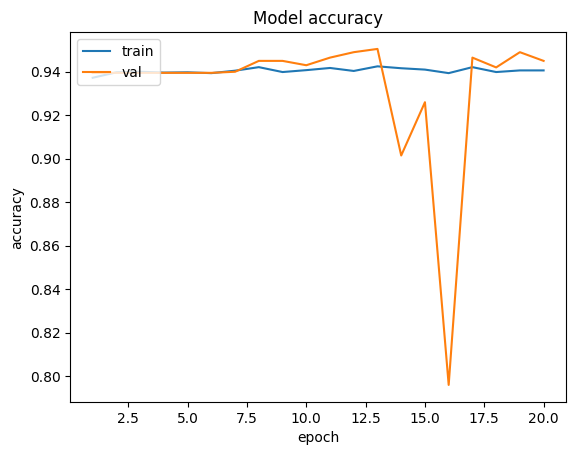

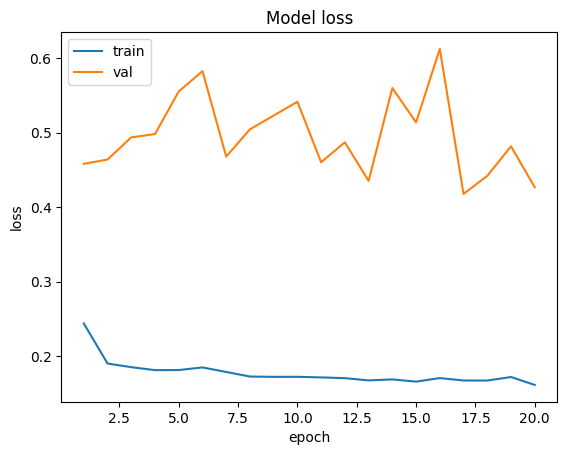

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
########################################################################################################################################################################

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train2.csv")
print(credit.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [ ]:
credit['NAME_TYPE_SUITE'].fillna("Unaccompanied", inplace=True)
credit['OCCUPATION_TYPE'].fillna("Other", inplace=True)
credit['AMT_GOODS_PRICE'].fillna(credit['AMT_GOODS_PRICE'].mean(), inplace=True)
credit['OWN_CAR_AGE'].fillna(credit['OWN_CAR_AGE'].mean(), inplace=True)
credit['EXT_SOURCE_1'].fillna(credit['EXT_SOURCE_1'].mean(), inplace=True)
credit['EXT_SOURCE_2'].fillna(credit['EXT_SOURCE_2'].mean(), inplace=True)
credit['EXT_SOURCE_3'].fillna(credit['EXT_SOURCE_3'].mean(), inplace=True)
credit['APARTMENTS_AVG'].fillna(credit['APARTMENTS_AVG'].mean(), inplace=True)
credit['YEARS_BEGINEXPLUATATION_AVG'].fillna(credit['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)
credit['YEARS_BUILD_AVG'].fillna(credit['YEARS_BUILD_AVG'].mean(), inplace=True)
credit['COMMONAREA_AVG'].fillna(credit['COMMONAREA_AVG'].mean(), inplace=True)
credit['ELEVATORS_AVG'].fillna(credit['ELEVATORS_AVG'].mean(), inplace=True)
credit['BASEMENTAREA_AVG'].fillna(credit['BASEMENTAREA_AVG'].mean(), inplace=True)
credit['ENTRANCES_AVG'].fillna(credit['ENTRANCES_AVG'].mean(), inplace=True)
credit['FLOORSMAX_AVG'].fillna(credit['FLOORSMAX_AVG'].mean(), inplace=True)
credit['FLOORSMIN_AVG'].fillna(credit['FLOORSMIN_AVG'].mean(), inplace=True)
credit['LANDAREA_AVG'].fillna(credit['LANDAREA_AVG'].mean(), inplace=True)
credit['LIVINGAPARTMENTS_AVG'].fillna(credit['LIVINGAPARTMENTS_AVG'].mean(), inplace=True)
credit['LIVINGAREA_AVG'].fillna(credit['LIVINGAREA_AVG'].mean(), inplace=True)
credit['NONLIVINGAPARTMENTS_AVG'].fillna(credit['NONLIVINGAPARTMENTS_AVG'].mean(), inplace=True)
credit['NONLIVINGAREA_AVG'].fillna(credit['NONLIVINGAREA_AVG'].mean(), inplace=True)
credit['APARTMENTS_MODE'].fillna(credit['APARTMENTS_MODE'].mean(), inplace=True)
credit['YEARS_BEGINEXPLUATATION_MODE'].fillna(credit['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace=True)
credit['YEARS_BUILD_MODE'].fillna(credit['YEARS_BUILD_MODE'].mean(), inplace=True)
credit['COMMONAREA_MODE'].fillna(credit['COMMONAREA_MODE'].mean(), inplace=True)
credit['ELEVATORS_MODE'].fillna(credit['ELEVATORS_MODE'].mean(), inplace=True)
credit['BASEMENTAREA_MODE'].fillna(credit['BASEMENTAREA_MODE'].mean(), inplace=True)
credit['ENTRANCES_MODE'].fillna(credit['ENTRANCES_MODE'].mean(), inplace=True)
credit['FLOORSMAX_MODE'].fillna(credit['FLOORSMAX_MODE'].mean(), inplace=True)
credit['FLOORSMIN_MODE'].fillna(credit['FLOORSMIN_MODE'].mean(), inplace=True)
credit['LANDAREA_MODE'].fillna(credit['LANDAREA_MODE'].mean(), inplace=True)
credit['LIVINGAPARTMENTS_MODE'].fillna(credit['LIVINGAPARTMENTS_MODE'].mean(), inplace=True)
credit['LIVINGAREA_MODE'].fillna(credit['LIVINGAREA_MODE'].mean(), inplace=True)
credit['NONLIVINGAPARTMENTS_MODE'].fillna(credit['NONLIVINGAPARTMENTS_MODE'].mean(), inplace=True)
credit['NONLIVINGAREA_MODE'].fillna(credit['NONLIVINGAREA_MODE'].mean(), inplace=True)
credit['APARTMENTS_MEDI'].fillna(credit['APARTMENTS_MEDI'].mean(), inplace=True)
credit['YEARS_BEGINEXPLUATATION_MEDI'].fillna(credit['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)
credit['YEARS_BUILD_MEDI'].fillna(credit['YEARS_BUILD_MEDI'].mean(), inplace=True)
credit['COMMONAREA_MEDI'].fillna(credit['COMMONAREA_MEDI'].mean(), inplace=True)
credit['ELEVATORS_MEDI'].fillna(credit['ELEVATORS_MEDI'].mean(), inplace=True)
credit['BASEMENTAREA_MEDI'].fillna(credit['BASEMENTAREA_MEDI'].mean(), inplace=True)
credit['ENTRANCES_MEDI'].fillna(credit['ENTRANCES_MEDI'].mean(), inplace=True)
credit['FLOORSMAX_MEDI'].fillna(credit['FLOORSMAX_MEDI'].mean(), inplace=True)
credit['FLOORSMIN_MEDI'].fillna(credit['FLOORSMIN_MEDI'].mean(), inplace=True)
credit['LANDAREA_MEDI'].fillna(credit['LANDAREA_MEDI'].mean(), inplace=True)
credit['LIVINGAPARTMENTS_MEDI'].fillna(credit['LIVINGAPARTMENTS_MEDI'].mean(), inplace=True)
credit['LIVINGAREA_MEDI'].fillna(credit['LIVINGAREA_MEDI'].mean(), inplace=True)
credit['NONLIVINGAPARTMENTS_MEDI'].fillna(credit['NONLIVINGAPARTMENTS_MEDI'].mean(), inplace=True)
credit['NONLIVINGAREA_MEDI'].fillna(credit['NONLIVINGAREA_MEDI'].mean(), inplace=True)
credit['FONDKAPREMONT_MODE'].fillna("reg oper account", inplace=True)
credit['HOUSETYPE_MODE'].fillna("block of flats", inplace=True)
credit['TOTALAREA_MODE'].fillna(credit['TOTALAREA_MODE'].mean(), inplace=True)
credit['WALLSMATERIAL_MODE'].fillna("block", inplace=True)
credit['EMERGENCYSTATE_MODE'].fillna("No", inplace=True)
credit['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(credit['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(credit['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(credit['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(credit['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['DAYS_LAST_PHONE_CHANGE'].fillna(credit['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(credit['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(credit['AMT_REQ_CREDIT_BUREAU_DAY'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(credit['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_MON'].fillna(credit['AMT_REQ_CREDIT_BUREAU_MON'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(credit['AMT_REQ_CREDIT_BUREAU_QRT'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(credit['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)



In [ ]:
print(credit.isnull().sum())
print(credit['TARGET'].value_counts())

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

In [ ]:
non_fraud = credit[credit['TARGET'] == 0]
fraud = credit[credit['TARGET'] == 1]
print(credit['TARGET'].value_counts())

TARGET
0    1854
1     145
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)


(1854, 122) (145, 122)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100031       1         Cash loans           F            N   
2      100047       1         Cash loans           M            N   
3      100049       1         Cash loans           F            N   
4      100096       1         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          112500.0    979992.0      27076.5   
2               Y             0          202500.0   1193580.0      35028.0   
3               N             0          135000.0    288873.0      16258.5   
4               Y             0           81000.0    252000.0      14593.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied               Working

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()

# Select only numerical columns for scaling
numerical_cols = credit.select_dtypes(include=['number']).columns
X = scaler.fit_transform(credit[numerical_cols].drop(['TARGET'], axis=1, errors='ignore'))
y = credit['TARGET']

# check the shape
print(X.shape, y.shape)

(1999, 105) (1999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/10, Best Cost: 0.07999998331069946
Iter 2/10, Best Cost: 0.07999998331069946
Iter 3/10, Best Cost: 0.07999998331069946
Iter 4/10, Best Cost: 0.07999998331069946
Iter 5/10, Best Cost: 0.07999998331069946
Iter 6/10, Best Cost: 0.07999998331069946
Iter 7/10, Best Cost: 0.07999998331069946
Iter 8/10, Best Cost: 0.07999998331069946
Iter 9/10, Best Cost: 0.07999998331069946
Iter 10/10, Best Cost: 0.07999998331069946
Best Position: [1.76587835e-01 3.71741216e-01 8.32508863e-02 3.90519750e-02
 6.96595875e-01 8.46255202e-01 6.01086036e-01 5.41238144e-01
 2.74877328e-01 8.84897614e-02 4.75379427e-01 2.18972606e-01
 2.77801616e-01 3.43747435e-01 4.92931432e-01 6.95971890e-01
 4.82552247e-02 9.35314896e-01 4.87156743e-01 2.26657334e-01
 1.80760852e-01 3.81977817e-01 9.57087303e-03 9.64435342e-01
 2.24116802e-01 9.12230033e-01 7.43032189e-01 5.84510369e-01
 8.03202413e-04 1.86459138e-01 8.42079648e-01 5.64222819e-01
 6.88135123e-01 1.65693529e-01 4.11029502e-01 9.74967265e-01
 7.81672190e-01

In [ ]:
# Convert best_pos to binary vector
threshold = 0.5
best_features_binary = best_pos > threshold

# Select the best features
X_selected = X[:, best_features_binary]

print(f"Selected Features Shape: {X_selected.shape}")
print(f"Selected Features Indices: {np.where(best_features_binary)[0]}")


Selected Features Shape: (1999, 48)
Selected Features Indices: [  4   5   6   7  15  17  23  25  26  27  30  31  32  35  36  39  40  41
  43  47  48  50  53  54  55  56  57  61  62  63  64  67  69  70  73  74
  75  77  81  83  85  86  89  94  95  96  99 103]


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1599, 48, 1)
Testing data shape: (400, 48, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_667"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_694 (Conv1D)         (None, 48, 64)            128       
                                                                 
 conv1d_695 (Conv1D)         (None, 48, 64)            4160      
                                                                 
 dropout_1358 (Dropout)      (None, 48, 64)            0         
                                                                 
 conv1d_696 (Conv1D)         (None, 48, 64)            4160      
                                                                 
 dropout_1359 (Dropout)      (None, 48, 64)            0         
                                                                 
 conv1d_697 (Conv1D)         (None, 48, 64)            4160      
                                                                 
 dropout_1360 (Dropout)      (None, 48, 64)         

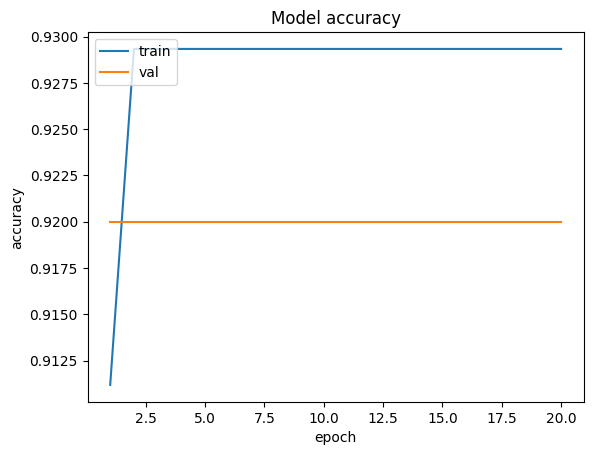

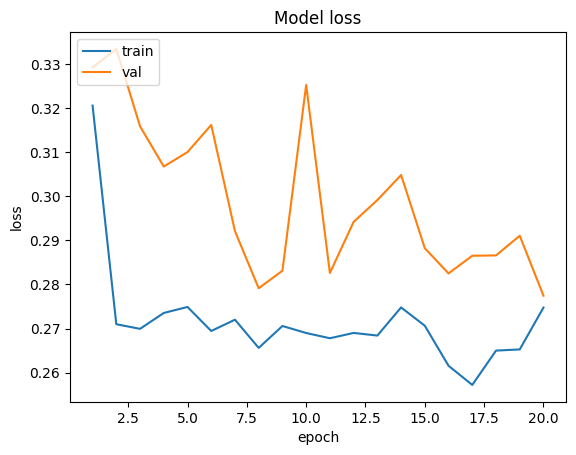

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
##########################################################################################################################################################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train3.csv")
print(credit.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940                1          1   
1                        1.294219                1          0   
2                        0.427715                1          0   
3                        0.362663                1          1   
4                        2.222767                1          1   

   used_pin_number  online_order  fraud  
0                0             0      0  
1                0             0      0  
2                0             1      0  
3                0             1      0  
4                0             1      0  


In [ ]:
print(credit.isnull().sum())
print(credit['fraud'].value_counts())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
fraud
0    9158
1     841
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['fraud'] == 0]
fraud = credit[credit['fraud'] == 1]
print(credit['fraud'].value_counts())

fraud
0    9158
1     841
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

(9158, 8) (841, 8)
   distance_from_home  distance_from_last_transaction  \
0            2.131956                       56.372401   
1            3.803057                       67.241081   
2           15.694986                      175.989182   
3           26.711462                        1.552008   
4           10.664474                        1.565769   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        6.358667                1          0   
1                        1.872950                1          0   
2                        0.855623                1          0   
3                        4.603601                1          1   
4                        4.886521                1          0   

   used_pin_number  online_order  fraud  
0                0             1      1  
1                0             1      1  
2                0             1      1  
3                0             1      1  
4                0             1     

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['fraud'], axis=1))
y = credit['fraud']

# check the shape
print(X.shape, y.shape)

(9999, 7) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 50
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.008499979972839355
Iter 2/10, Best Cost: 0.008499979972839355
Iter 3/10, Best Cost: 0.008499979972839355
Iter 4/10, Best Cost: 0.008000016212463379
Iter 5/10, Best Cost: 0.008000016212463379
Iter 6/10, Best Cost: 0.008000016212463379
Iter 7/10, Best Cost: 0.008000016212463379
Iter 8/10, Best Cost: 0.008000016212463379
Iter 9/10, Best Cost: 0.008000016212463379
Iter 10/10, Best Cost: 0.008000016212463379
Best Position: [0.98337232 0.79012139 0.6258392  0.22771938 0.60171936 0.97045713
 0.90519692]
Best Cost: 0.008000016212463379


In [ ]:
# Convert best_pos to binary vector
threshold = 0.7
best_features_binary = best_pos > threshold

# Select the best features
X_selected = X[:, best_features_binary]

print(f"Selected Features Shape: {X_selected.shape}")
print(f"Selected Features Indices: {np.where(best_features_binary)[0]}")


Selected Features Shape: (9999, 4)
Selected Features Indices: [0 1 5 6]


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 6, 1)
Testing data shape: (2000, 6, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_1125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1179 (Conv1D)        (None, 6, 64)             128       
                                                                 
 conv1d_1180 (Conv1D)        (None, 6, 64)             4160      
                                                                 
 dropout_2298 (Dropout)      (None, 6, 64)             0         
                                                                 
 conv1d_1181 (Conv1D)        (None, 6, 64)             4160      
                                                                 
 dropout_2299 (Dropout)      (None, 6, 64)             0         
                                                                 
 conv1d_1182 (Conv1D)        (None, 6, 64)             4160      
                                                                 
 dropout_2300 (Dropout)      (None, 6, 64)         

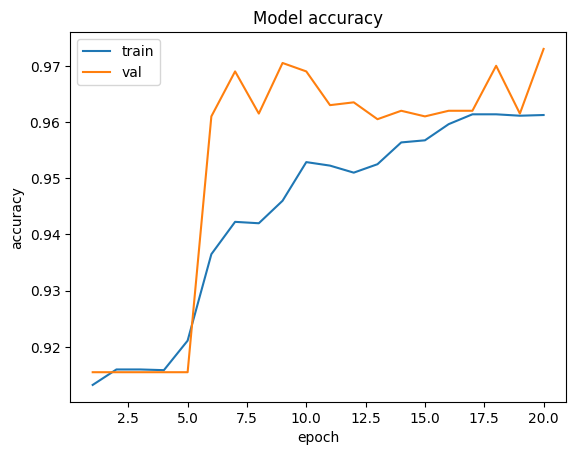

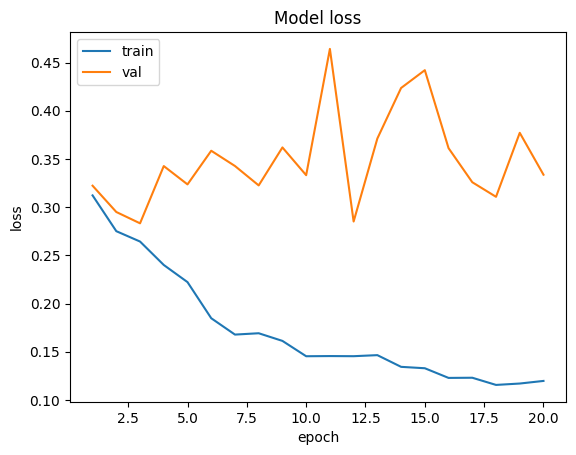

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
###########################################################################################################################################################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train4.csv")
print(credit.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [ ]:
print(credit.isnull().sum())
print(credit['default payment next month'].value_counts())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
default payment next month
0    7740
1    2259
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['default payment next month'] == 0]
fraud = credit[credit['default payment next month'] == 1]
print(credit['default payment next month'].value_counts())

default payment next month
0    7740
1    2259
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)


(7740, 25) (2259, 25)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head(15))

    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    1      20000    2          2         1   24      2      2     -1     -1   
1    2     120000    2          2         2   26     -1      2      0      0   
2   14      70000    1          2         2   30      1      2      2      0   
3   17      20000    1          1         2   24      0      0      2      2   
4   22     120000    2          2         1   39     -1     -1     -1     -1   
5   23      70000    2          2         2   26      2      0      0      2   
6   24     450000    2          1         1   40     -2     -2     -2     -2   
7   27      60000    1          1         2   27      1     -2     -1     -1   
8   32      50000    1          2         2   33      2      0      0      0   
9   39      50000    1          1         2   25      1     -1     -1     -2   
10  46     210000    1          1         2   29     -2     -2     -2     -2   
11  47      20000    2          1       

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['default payment next month'], axis=1))
y = credit['default payment next month']

# check the shape
print(X.shape, y.shape)

(9999, 24) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 10
max_iter = 5

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/1, Best Cost: 0.18699997663497925
Best Position: [0.88407814 0.78174046 0.14177079 0.83399924 0.58168592 0.92726813
 0.54688199 0.37041375 0.30340627 0.95498559 0.75501572 0.93785004
 0.37669924 0.91172883 0.16467376 0.28579722 0.29822392 0.00181069
 0.1482731  0.96345104 0.69862401 0.20955829 0.11245389 0.58730888]
Best Cost: 0.18699997663497925


In [ ]:
# Convert best_pos to binary vector
threshold = 0.5
best_features_binary = best_pos > threshold

# Select the best features
X_selected = X[:, best_features_binary]

print(f"Selected Features Shape: {X_selected.shape}")
print(f"Selected Features Indices: {np.where(best_features_binary)[0]}")


Selected Features Shape: (9999, 13)
Selected Features Indices: [ 0  1  3  4  5  6  9 10 11 13 19 20 23]


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 13, 1)
Testing data shape: (2000, 13, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_315"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_315 (Conv1D)         (None, 13, 64)            128       
                                                                 
 conv1d_316 (Conv1D)         (None, 13, 64)            4160      
                                                                 
 dropout_630 (Dropout)       (None, 13, 64)            0         
                                                                 
 conv1d_317 (Conv1D)         (None, 13, 64)            4160      
                                                                 
 dropout_631 (Dropout)       (None, 13, 64)            0         
                                                                 
 conv1d_318 (Conv1D)         (None, 13, 64)            4160      
                                                                 
 dropout_632 (Dropout)       (None, 13, 64)         

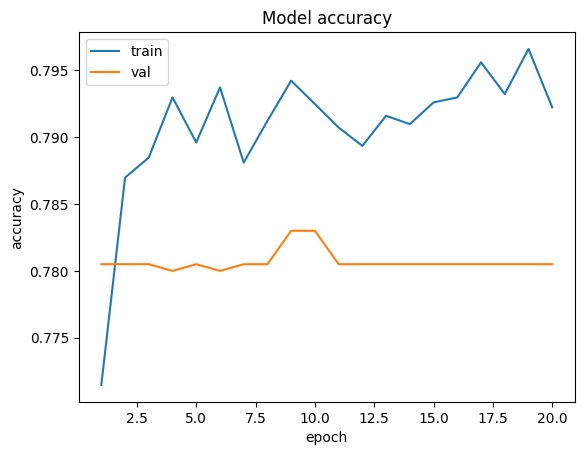

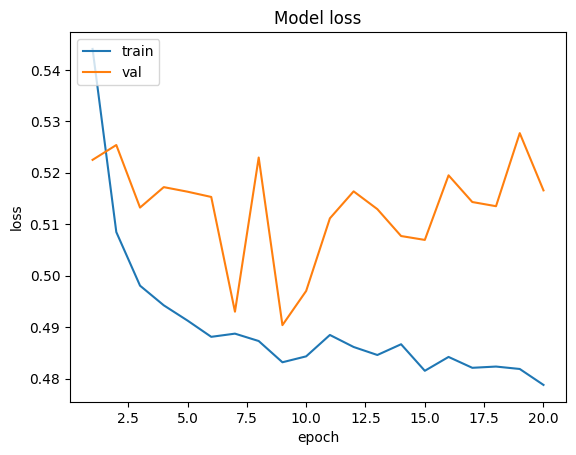

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
#######################################################################################################################################################

In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train5.csv")
print(credit.head())

       id        V1        V2        V3        V4        V5        V6  \
0  279805  1.827460 -0.426514 -0.013513 -0.519332  0.387572 -0.067465   
1  279806  1.581915 -0.379354  0.574216  0.569881  0.312033  1.163681   
2  279807  1.753590 -0.240635  0.045037  0.536331  0.734859  0.660075   
3  279808 -0.889547  0.722871 -0.528641 -1.178649 -0.230096 -0.055385   
4  279809  0.623022 -0.023293  0.681849  0.825261  0.510697  0.512104   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.526126 -0.231325  0.791046  ... -0.005805  0.812425 -0.004368  1.727250   
1  0.214839 -0.087211  0.312751  ... -0.086431  0.091746  0.236810  0.035466   
2  0.527269 -0.172371 -0.069726  ... -0.035111  0.406648 -0.015798  0.071870   
3 -0.030267  0.624043  1.241219  ... -0.282254 -1.084181  0.382756  0.239206   
4  0.653153 -0.177803 -0.465281  ...  0.016685  0.889063 -0.099198  0.035862   

        V25       V26       V27       V28    Amount  Class  
0  0.449570 -0.3263

In [ ]:
print(credit.isnull().sum())
print(credit['Class'].value_counts())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Class
0.0    4997
1.0     758
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['Class'] == 0]
fraud = credit[credit['Class'] == 1]
print(credit['Class'].value_counts())

Class
0.000000    4997
1.000000     758
0.131712       1
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(4997, 31) (758, 31)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head(15))

        id        V1        V2        V3        V4        V5        V6  \
0   279863 -0.396673 -0.091731 -0.585971  0.039430 -0.237606 -0.792429   
1   280143  1.143756 -0.044111 -0.655425 -0.072260  0.440226 -0.339823   
2   280149 -0.061879 -0.091522 -0.183707 -0.421399 -0.114948  0.474109   
3   281144 -0.629479 -0.254448 -0.709210  0.061238 -0.032503 -1.434553   
4   281674  1.727634 -0.391385 -0.259118 -0.445952  0.790247  0.420296   
5   284807  1.038065 -0.281000  0.319715 -0.166064  0.422251  0.338833   
6   284808 -0.154962 -0.069602  0.312257 -0.032757  1.231356 -0.550709   
7   284809 -1.704517  2.599199 -1.205391  0.503527 -0.949674  3.226002   
8   284810  1.008173 -0.676624  0.359233 -0.891126  0.049979  0.282140   
9   284811 -0.270998  0.303004 -0.319950  0.208841 -0.217004 -0.017104   
10  284812  0.840636  0.304624 -0.694290  0.833546  0.587702 -0.364908   
11  284813  0.193424 -0.158922  0.338354 -0.196086  0.546654  0.259847   
12  284814 -0.600421  0.646734 -0.7520

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['Class'], axis=1))
y = credit['Class']

# check the shape
print(X.shape, y.shape)

(5755, 30) (5755,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/10, Best Cost: 0.006081640720367432
Iter 2/10, Best Cost: 0.005212843418121338
Iter 3/10, Best Cost: 0.005212843418121338
Iter 4/10, Best Cost: 0.004344046115875244
Iter 5/10, Best Cost: 0.0034752488136291504
Iter 6/10, Best Cost: 0.0034752488136291504
Iter 7/10, Best Cost: 0.0034752488136291504
Iter 8/10, Best Cost: 0.0034752488136291504
Iter 9/10, Best Cost: 0.0034752488136291504
Iter 10/10, Best Cost: 0.0034752488136291504
Best Position: [0.53082829 0.63196722 0.78347159 0.38900511 0.55866509 0.95162649
 0.46728398 0.02511214 0.00257571 0.32940746 0.5718954  0.98317417
 0.55110282 0.16366205 0.19572138 0.90446088 0.91335088 0.39248466
 0.19073214 0.48722727 0.34769984 0.37281798 0.25794251 0.56319086
 0.53605083 0.57191378 0.91317262 0.66609873 0.74398251 0.65822232]
Best Cost: 0.0034752488136291504


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (4604, 17, 1)
Testing data shape: (1151, 17, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_667"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_685 (Conv1D)         (None, 17, 64)            128       
                                                                 
 conv1d_686 (Conv1D)         (None, 17, 64)            4160      
                                                                 
 dropout_1350 (Dropout)      (None, 17, 64)            0         
                                                                 
 conv1d_687 (Conv1D)         (None, 17, 64)            4160      
                                                                 
 dropout_1351 (Dropout)      (None, 17, 64)            0         
                                                                 
 conv1d_688 (Conv1D)         (None, 17, 64)            4160      
                                                                 
 dropout_1352 (Dropout)      (None, 17, 64)         

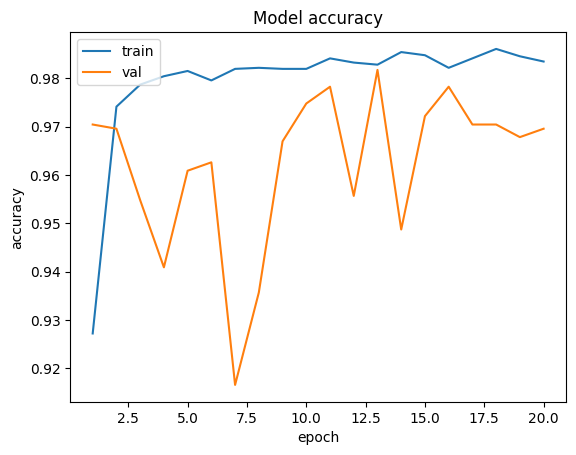

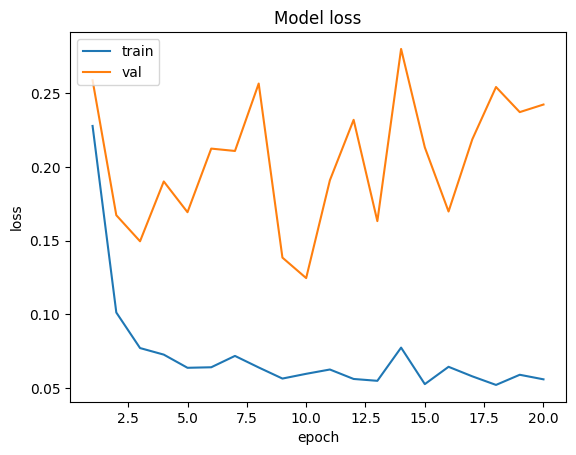

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
###########################################################################################################################################################################

In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train6.csv")
print(credit.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(credit.isnull().sum())
print(credit['Class'].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    9961
1      38
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(4997, 31) (758, 31)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head(45))

        id        V1        V2        V3        V4        V5        V6  \
0   279863 -0.396673 -0.091731 -0.585971  0.039430 -0.237606 -0.792429   
1   280143  1.143756 -0.044111 -0.655425 -0.072260  0.440226 -0.339823   
2   280149 -0.061879 -0.091522 -0.183707 -0.421399 -0.114948  0.474109   
3   281144 -0.629479 -0.254448 -0.709210  0.061238 -0.032503 -1.434553   
4   281674  1.727634 -0.391385 -0.259118 -0.445952  0.790247  0.420296   
5   284807  1.038065 -0.281000  0.319715 -0.166064  0.422251  0.338833   
6   284808 -0.154962 -0.069602  0.312257 -0.032757  1.231356 -0.550709   
7   284809 -1.704517  2.599199 -1.205391  0.503527 -0.949674  3.226002   
8   284810  1.008173 -0.676624  0.359233 -0.891126  0.049979  0.282140   
9   284811 -0.270998  0.303004 -0.319950  0.208841 -0.217004 -0.017104   
10  284812  0.840636  0.304624 -0.694290  0.833546  0.587702 -0.364908   
11  284813  0.193424 -0.158922  0.338354 -0.196086  0.546654  0.259847   
12  284814 -0.600421  0.646734 -0.7520

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['Class'], axis=1))
y = credit['Class']

# check the shape
print(X.shape, y.shape)

(5755, 30) (5755,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 50
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/10, Best Cost: 0.005212843418121338
Iter 2/10, Best Cost: 0.005212843418121338
Iter 3/10, Best Cost: 0.004344046115875244
Iter 4/10, Best Cost: 0.004344046115875244
Iter 5/10, Best Cost: 0.004344046115875244
Iter 6/10, Best Cost: 0.004344046115875244
Iter 7/10, Best Cost: 0.0034752488136291504
Iter 8/10, Best Cost: 0.0034752488136291504
Iter 9/10, Best Cost: 0.0034752488136291504
Iter 10/10, Best Cost: 0.0034752488136291504
Best Position: [0.74703845 0.92561433 0.08265562 0.24510053 0.0924797  0.24611906
 0.51030416 0.40277037 0.91395714 0.98713221 0.16741693 0.74423429
 0.61733827 0.6369549  0.74168897 0.43790505 0.16361806 0.38264586
 0.87349108 0.43167201 0.927927   0.1013781  0.33623051 0.747864
 0.64442243 0.68997801 0.5211064  0.62586806 0.35977538 0.87888519]
Best Cost: 0.0034752488136291504


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (4604, 17, 1)
Testing data shape: (1151, 17, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_1173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1200 (Conv1D)        (None, 17, 64)            128       
                                                                 
 conv1d_1201 (Conv1D)        (None, 17, 64)            4160      
                                                                 
 dropout_2370 (Dropout)      (None, 17, 64)            0         
                                                                 
 conv1d_1202 (Conv1D)        (None, 17, 64)            4160      
                                                                 
 dropout_2371 (Dropout)      (None, 17, 64)            0         
                                                                 
 conv1d_1203 (Conv1D)        (None, 17, 64)            4160      
                                                                 
 dropout_2372 (Dropout)      (None, 17, 64)        

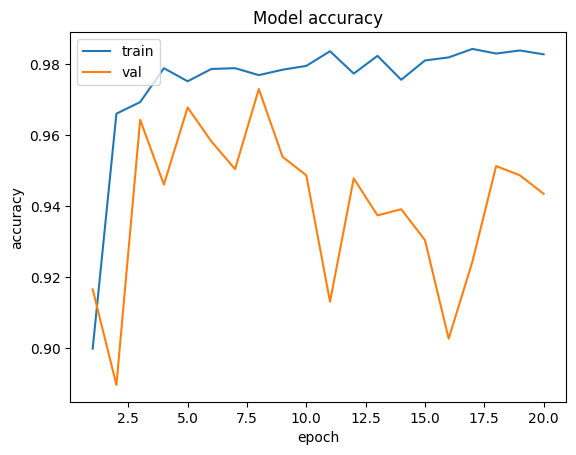

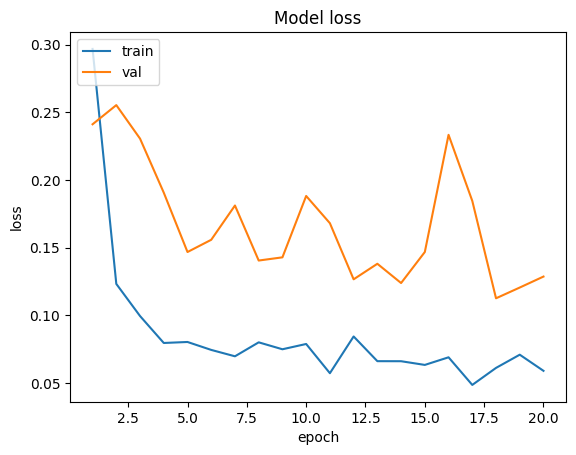

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
###########################################################################################################################################################################

In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train7.csv")
print(credit.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [ ]:
print(credit.isnull().sum())
print(credit['NFLAG_INSURED_ON_APPROVAL'].value_counts())

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                    2085
AMT_APPLICATION                   0
AMT_CREDIT                        0
AMT_DOWN_PAYMENT               5045
AMT_GOODS_PRICE                2122
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
FLAG_LAST_APPL_PER_CONTRACT       0
NFLAG_LAST_APPL_IN_DAY            0
RATE_DOWN_PAYMENT              5045
RATE_INTEREST_PRIMARY          9962
RATE_INTEREST_PRIVILEGED       9962
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE                4847
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY        

In [ ]:
credit['NFLAG_INSURED_ON_APPROVAL'].fillna(0, inplace=True)
credit['AMT_ANNUITY'].fillna(credit['AMT_ANNUITY'].mean(), inplace=True)
credit['AMT_DOWN_PAYMENT'].fillna(credit['AMT_DOWN_PAYMENT'].mean(), inplace=True)
credit['AMT_GOODS_PRICE'].fillna(credit['AMT_GOODS_PRICE'].mean(), inplace=True)
credit['RATE_DOWN_PAYMENT'].fillna(credit['RATE_DOWN_PAYMENT'].mean(), inplace=True)
credit['RATE_INTEREST_PRIMARY'].fillna(credit['RATE_INTEREST_PRIMARY'].mean(), inplace=True)
credit['RATE_INTEREST_PRIVILEGED'].fillna(credit['RATE_INTEREST_PRIVILEGED'].mean(), inplace=True)
credit['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
credit['CNT_PAYMENT'].fillna(credit['CNT_PAYMENT'].mean(), inplace=True)
credit['DAYS_FIRST_DRAWING'].fillna(credit['DAYS_FIRST_DRAWING'].mean(), inplace=True)
credit['DAYS_FIRST_DUE'].fillna(credit['DAYS_FIRST_DUE'].mean(), inplace=True)
credit['DAYS_LAST_DUE_1ST_VERSION'].fillna(credit['DAYS_LAST_DUE_1ST_VERSION'].mean(), inplace=True)
credit['DAYS_LAST_DUE'].fillna(credit['DAYS_LAST_DUE'].mean(), inplace=True)
credit['DAYS_TERMINATION'].fillna(credit['DAYS_TERMINATION'].mean(), inplace=True)
credit['PRODUCT_COMBINATION'].fillna('Cash', inplace=True)
print(credit.isnull().sum())
print(credit['NFLAG_INSURED_ON_APPROVAL'].value_counts())

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
RATE_INTEREST_PRIMARY          0
RATE_INTEREST_PRIVILEGED       0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_CO

In [ ]:
non_fraud = credit[credit['NFLAG_INSURED_ON_APPROVAL'] == 0]
fraud = credit[credit['NFLAG_INSURED_ON_APPROVAL'] == 1]
print(credit['NFLAG_INSURED_ON_APPROVAL'].value_counts())

NFLAG_INSURED_ON_APPROVAL
0.0    8011
1.0    1988
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(8011, 37) (1988, 37)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2802425      108129         Cash loans    25188.615         607500.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
2     2819243      176158         Cash loans    47041.335         450000.0   
3     1383531      199383         Cash loans    23703.930         315000.0   
4     1715995      447712         Cash loans    11368.620         270000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    679671.0       6374.445524         607500.0                   THURSDAY   
1    136444.5       6374.445524         112500.0                    TUESDAY   
2    470790.0       6374.445524         450000.0                     MONDAY   
3    340573.5       6374.445524         315000.0                   SATURDAY   
4    335754.0       6374.445524         270000.0                     FRIDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Handle categorical column with one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(credit[['PRODUCT_COMBINATION']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['PRODUCT_COMBINATION']))
# Concatenate encoded data with the rest of the DataFrame
# Drop the original 'PRODUCT_COMBINATION' column from 'credit'
credit_encoded = pd.concat([credit.drop('PRODUCT_COMBINATION', axis=1), encoded_df], axis=1)

# Now proceed with scaling, EXCLUDING the one-hot encoded columns
# Select only the numerical columns for scaling
numerical_columns = credit_encoded.select_dtypes(include=['number']).columns

# Create an instance of StandardScaler
scaler = StandardScaler() # Initialize the scaler

X = scaler.fit_transform(credit_encoded[numerical_columns].drop(['NFLAG_INSURED_ON_APPROVAL'], axis=1))
y = credit_encoded['NFLAG_INSURED_ON_APPROVAL']

# Check the shape
print(X.shape, y.shape)

(9999, 37) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/10, Best Cost: 0.08399999141693115
Iter 2/10, Best Cost: 0.08300000429153442
Iter 3/10, Best Cost: 0.08300000429153442
Iter 4/10, Best Cost: 0.08300000429153442
Iter 5/10, Best Cost: 0.08300000429153442
Iter 6/10, Best Cost: 0.08300000429153442
Iter 7/10, Best Cost: 0.08300000429153442
Iter 8/10, Best Cost: 0.0820000171661377
Iter 9/10, Best Cost: 0.0820000171661377
Iter 10/10, Best Cost: 0.0820000171661377
Best Position: [0.42940278 0.81289554 0.09062652 0.57684539 0.50308287 0.61839407
 0.93766171 0.74912877 0.26109882 0.59537161 0.68659776 0.84480872
 0.88731044 0.99157945 0.75871448 0.86060779 0.43038418 0.4394208
 0.92696455 0.38949222 0.85324698 0.12345796 0.9692384  0.12717672
 0.33168653 0.76792862 0.00521939 0.01329368 0.99574285 0.58808675
 0.07582543 0.81360104 0.22320109 0.72907282 0.46774572 0.90116575
 0.96444158]
Best Cost: 0.0820000171661377


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 23, 1)
Testing data shape: (2000, 23, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_300"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_300 (Conv1D)         (None, 23, 64)            128       
                                                                 
 conv1d_301 (Conv1D)         (None, 23, 64)            4160      
                                                                 
 dropout_600 (Dropout)       (None, 23, 64)            0         
                                                                 
 conv1d_302 (Conv1D)         (None, 23, 64)            4160      
                                                                 
 dropout_601 (Dropout)       (None, 23, 64)            0         
                                                                 
 conv1d_303 (Conv1D)         (None, 23, 64)            4160      
                                                                 
 dropout_602 (Dropout)       (None, 23, 64)         

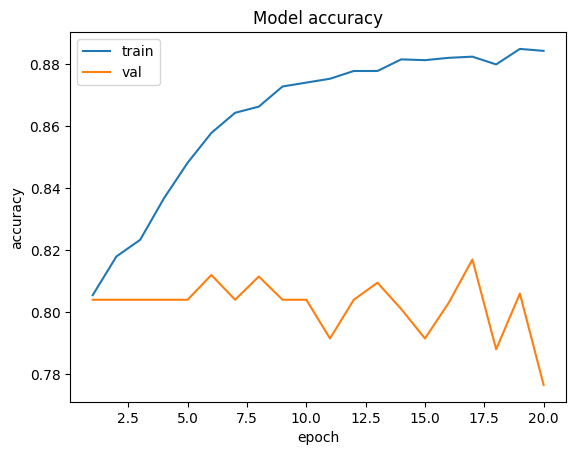

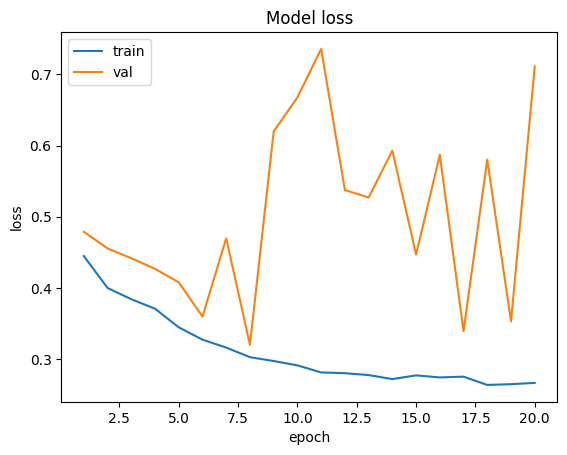

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
##############################################################################################################################################################################

In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train8.csv")
print(credit.head())

   col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      9   1354      0     18      0      1      7      9      0      0  ...   
1      0    239      0      1      0      1      0      0      0      0  ...   
2      0    260      0      4      0      3      6      0      0      0  ...   
3     17    682      0      1      0      0      8     17      0      0  ...   
4      1    540      0      2      0      1      7      1      0      0  ...   

   col_103  col_104  col_105  col_106  col_107  col_108  col_109  col_110  \
0        0        0        0        1        1        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        0        0        1        1        0        0        0   
3        0        1        0        1        1        0        0        0   
4        0        0        0        1        1        0        0        0   

   col_111  targets  
0       49        1  
1       55  

In [ ]:
print(credit.isnull().sum())
print(credit['targets'].value_counts())

col_0      0
col_1      0
col_2      0
col_3      0
col_4      0
          ..
col_108    0
col_109    0
col_110    0
col_111    0
targets    0
Length: 113, dtype: int64
targets
0    8001
1    1999
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['targets'] == 0]
fraud = credit[credit['targets'] == 1]
print(credit['targets'].value_counts())

targets
0    8001
1    1999
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(8001, 113) (1999, 113)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      9   1354      0     18      0      1      7      9      0      0  ...   
1      0    239      0      1      0      1      0      0      0      0  ...   
2      0    260      0      4      0      3      6      0      0      0  ...   
3     17    682      0      1      0      0      8     17      0      0  ...   
4      1    540      0      2      0      1      7      1      0      0  ...   

   col_103  col_104  col_105  col_106  col_107  col_108  col_109  col_110  \
0        0        0        0        1        1        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        0        0        1        1        0        0        0   
3        0        1        0        1        1        0        0        0   
4        0        0        0        1        1        0        0        0   

   col_111  targets  
0       49        1  
1       55  

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['targets'], axis=1))
y = credit['targets']

# check the shape
print(X.shape, y.shape)

(10000, 112) (10000,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 50
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/10, Best Cost: 0.08899998664855957
Iter 2/10, Best Cost: 0.08749997615814209
Iter 3/10, Best Cost: 0.08749997615814209
Iter 4/10, Best Cost: 0.08749997615814209
Iter 5/10, Best Cost: 0.08749997615814209
Iter 6/10, Best Cost: 0.08749997615814209
Iter 7/10, Best Cost: 0.08749997615814209
Iter 8/10, Best Cost: 0.08749997615814209
Iter 9/10, Best Cost: 0.08749997615814209
Iter 10/10, Best Cost: 0.08749997615814209
Best Position: [2.18664428e-01 2.75098778e-01 8.74755826e-01 3.83591446e-01
 3.87030844e-01 9.36420576e-01 6.19880480e-01 3.59027561e-01
 6.38500824e-01 6.30624488e-01 9.10578408e-01 3.32966450e-01
 7.77959285e-01 1.93448017e-01 6.56400508e-01 6.04026178e-01
 8.78360595e-01 3.90154257e-01 2.71103020e-01 6.08117498e-01
 8.70730359e-01 4.82726519e-01 7.96767051e-01 8.12369941e-01
 4.85788786e-01 4.94129008e-01 1.92904097e-01 1.87646450e-01
 5.59842934e-01 6.39972824e-01 2.96918749e-01 1.42236505e-01
 2.59849245e-01 6.92196065e-01 5.62706331e-01 7.57726099e-01
 9.55133164e-04

In [ ]:
# Convert best_pos to binary vector
threshold = 0.5
best_features_binary = best_pos > threshold

# Select the best features
X_selected = X[:, best_features_binary]

print(f"Selected Features Shape: {X_selected.shape}")
print(f"Selected Features Indices: {np.where(best_features_binary)[0]}")


Selected Features Shape: (10000, 60)
Selected Features Indices: [  2   5   6   8   9  10  12  14  15  16  19  20  22  23  28  29  33  34
  35  37  38  40  41  43  47  48  49  50  53  55  57  58  59  60  61  64
  65  68  72  74  75  77  82  84  86  87  88  89  90  91  93  94  97  98
  99 100 102 107 109 111]


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (8000, 60, 1)
Testing data shape: (2000, 60, 1)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_501"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_510 (Conv1D)         (None, 60, 64)            128       
                                                                 
 conv1d_511 (Conv1D)         (None, 60, 64)            4160      
                                                                 
 dropout_1010 (Dropout)      (None, 60, 64)            0         
                                                                 
 conv1d_512 (Conv1D)         (None, 60, 64)            4160      
                                                                 
 dropout_1011 (Dropout)      (None, 60, 64)            0         
                                                                 
 conv1d_513 (Conv1D)         (None, 60, 64)            4160      
                                                                 
 dropout_1012 (Dropout)      (None, 60, 64)         

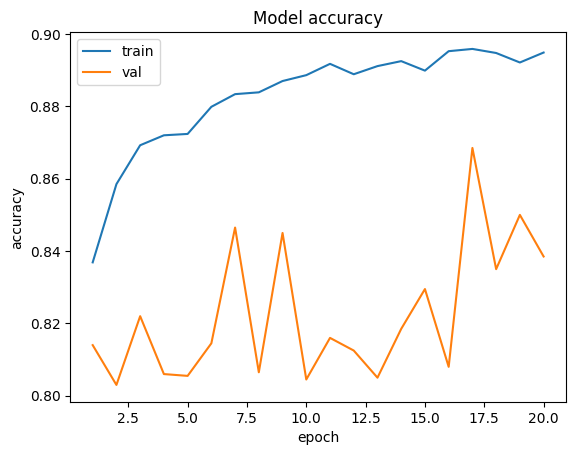

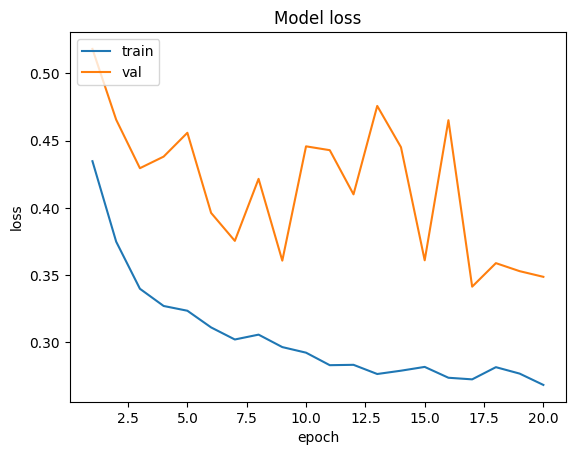

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
#######################################################################################################################################################################################

In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train9.csv")
print(credit.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [ ]:
print(credit.isnull().sum())
print(credit['isFraud'].value_counts())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64
isFraud
0    9931
1      68
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['isFraud'] == 0]
fraud = credit[credit['isFraud'] == 1]
print(credit['isFraud'].value_counts())

isFraud
0    9931
1      68
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(9931, 10) (68, 10)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1  


In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()

# Select only numerical columns
numerical_cols = credit.select_dtypes(include=['number']).columns
X = scaler.fit_transform(credit[numerical_cols]) # Scale only numerical columns
y = credit['isFraud']

# check the shape
print(X.shape, y.shape)

(9999, 7) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 5
max_iter = 1

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")




Iter 1/1, Best Cost: 0.0
Best Position: [0.57006361 0.69175532 0.68836324 0.6560566  0.95769775 0.35909597
 0.57323516]
Best Cost: 0.0


In [ ]:
# Convert best_pos to binary vector
threshold = 0.6
best_features_binary = best_pos > threshold

# Select the best features
X_selected = X[:, best_features_binary]

print(f"Selected Features Shape: {X_selected.shape}")
print(f"Selected Features Indices: {np.where(best_features_binary)[0]}")


Selected Features Shape: (9999, 4)
Selected Features Indices: [1 2 3 4]


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add hidden layers
for _ in range(9):
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_508"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_526 (Conv1D)         (None, 6, 64)             128       
                                                                 
 conv1d_527 (Conv1D)         (None, 6, 64)             4160      
                                                                 
 dropout_1032 (Dropout)      (None, 6, 64)             0         
                                                                 
 conv1d_528 (Conv1D)         (None, 6, 64)             4160      
                                                                 
 dropout_1033 (Dropout)      (None, 6, 64)             0         
                                                                 
 conv1d_529 (Conv1D)         (None, 6, 64)             4160      
                                                                 
 dropout_1034 (Dropout)      (None, 6, 64)          

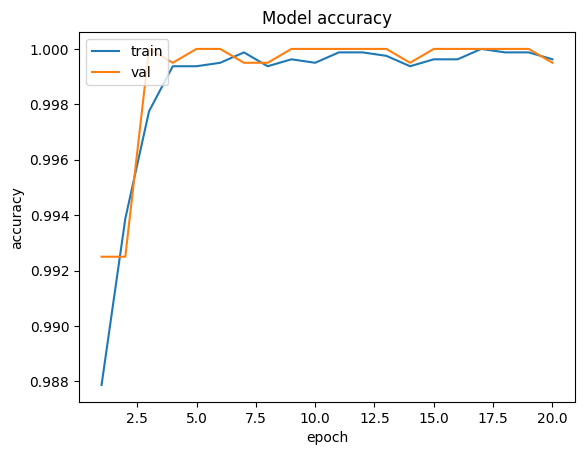

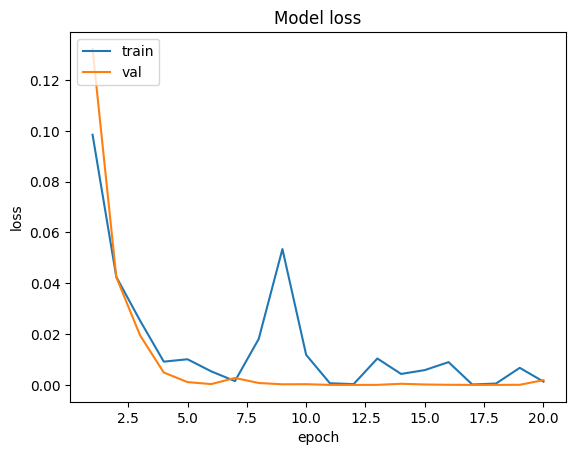

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)
